In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import statsmodels as st

In [2]:
dd=pd.read_csv(r'F:\VIRU\New folder\UK.csv')

In [3]:
dd.head()

,months,sales
0,2017-01,275
1,2017-02,143
2,2017-03,588
3,2017-04,244
4,2017-05,194


In [4]:
dd.tail()

,months,sales
43,2020-08,997
44,2020-09,5662
45,2020-10,416
46,2020-11,1016
47,2020-12,6288


In [5]:
dd['months']=pd.to_datetime(dd['months'])

In [6]:
dd.set_index('months',inplace=True)

<AxesSubplot:xlabel='months'>

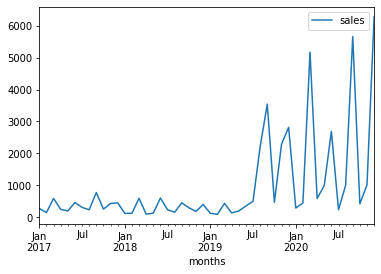

In [7]:
dd.plot()

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
dfuler = adfuller(dd['sales'])

In [10]:
dfuler
#p value <0.05 indicates stationary
#p value >0.05 indicates non stationary

(0.2793274261166047,
 0.9763759063345295,
 10,
 37,
 {'1%': -3.6209175221605827,
  '5%': -2.9435394610388332,
  '10%': -2.6104002410518627},
 601.5605596650407)

In [11]:
import statsmodels.api as sm

from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

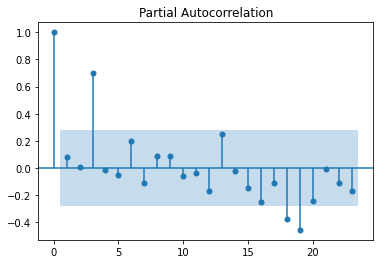

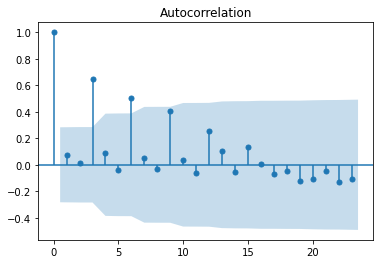

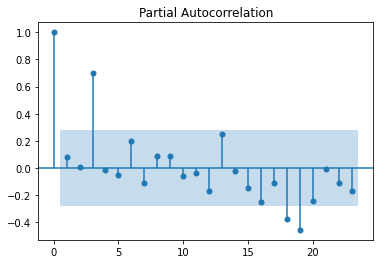

In [23]:
plot_acf(dd['sales'],lags=23)
plot_pacf(dd['sales'],lags=23)

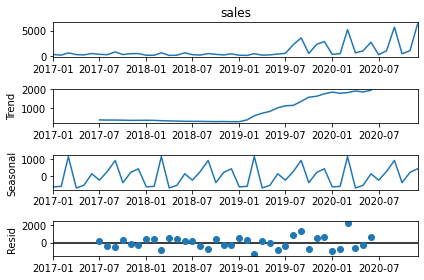

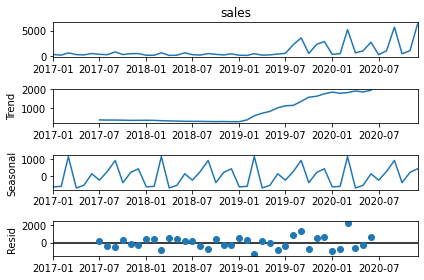

In [15]:
import statsmodels
decompose= statsmodels.tsa.seasonal.seasonal_decompose(dd['sales'])
decompose.plot()

In [16]:
import statsmodels.api as sm

In [39]:
models = sm.tsa.statespace.SARIMAX(dd['sales'],order=(3,1,0),seasonal_order=(1,1,0,6))
results=models.fit()

c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [52]:
dd['forecast']=results.predict(start=40,end=47,dynamic=True)

<AxesSubplot:xlabel='months'>

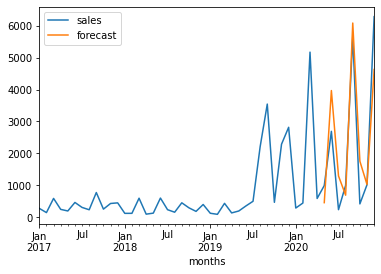

In [53]:
dd[['sales','forecast']].plot()

In [42]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             sales   No. Observations:                   48
Model:             SARIMAX(3, 1, 0)x(1, 1, 0, 6)   Log Likelihood                -336.236
Date:                           Sat, 20 Mar 2021   AIC                            682.472
Time:                                   10:06:11   BIC                            691.040
Sample:                               01-01-2017   HQIC                           685.592
                                    - 12-01-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6838      0.148     -4.613      0.000      -0.974      -0.393
ar.L2         -0.7778      0.133     -5.838      0.000      -1.039      -0.517
ar.L3          0.0489      0.141      0.347      0.729      -0.227       0.325
ar.S.L6       -0.4891      0.132     -3.702      0.000      -0.748      -0.230
sigma2      7.572e+05   1.37e+05      5.526      0.000    4.89e+05    1.03e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                21.53
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):              45.23   Skew:                             0.97
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
output=results.forecast(24)

In [44]:
output

2021-01-01    1280.320378
2021-02-01     218.669278
2021-03-01    8119.569697
2021-04-01    2069.715620
2021-05-01     777.770946
2021-06-01    6563.059074
2021-07-01    2599.961385
2021-08-01     723.477900
2021-09-01    8477.665875
2021-10-01    3156.532737
2021-11-01    1360.131343
2021-12-01    7681.404050
2022-01-01    3797.669623
2022-02-01    1233.996572
2022-03-01    9381.808428
2022-04-01    4357.468836
2022-05-01    2057.659291
2022-06-01    8137.444786
2022-07-01    4816.149699
2022-08-01    2124.655870
2022-09-01    9930.570061
2022-10-01    5253.455322
2022-11-01    2956.635468
2022-12-01    8930.595441
Freq: MS, Name: predicted_mean, dtype: float64

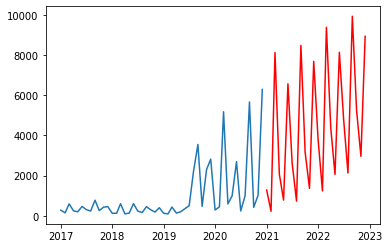

In [45]:
pyplot.plot(dd['sales'])
pyplot.plot(output,color='red')

In [46]:
from pandas.tseries.offsets import DateOffset

In [47]:
future_dates=[dd.index[-1]+DateOffset(months=x) for x in range(0,24)]

In [48]:
future_dates_dd = pd.DataFrame(index=future_dates[1:],columns=dd.columns)

In [49]:
future_dates_dd.tail()

,sales,forecast
2022-07-01,NaN,NaN
2022-08-01,NaN,NaN
2022-09-01,NaN,NaN
2022-10-01,NaN,NaN
2022-11-01,NaN,NaN


In [50]:
future_dd=pd.concat([dd,future_dates_dd])

In [56]:
future_dd['forecast']=results.predict(start=47,end=71,dynamic=True)

<AxesSubplot:>

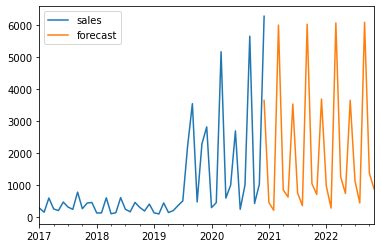

In [57]:
future_dd[['sales','forecast']].plot()